    JACOB KNOPPING
    1/23/2020
    
    19.5 CHALLENGE: MODEL COMPARISON (KNN vs OLS)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
diamonds = sns.load_dataset('diamonds')

In [3]:
diamonds.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [4]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
#Get correlations
corr = diamonds.corr()
#Sort correlations
corr_sorted = corr.price.sort_values(ascending=False)
print(corr_sorted)

price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64


(array([25335.,  9328.,  7393.,  3878.,  2364.,  1745.,  1306.,  1002.,
          863.,   726.]),
 array([  326. ,  2175.7,  4025.4,  5875.1,  7724.8,  9574.5, 11424.2,
        13273.9, 15123.6, 16973.3, 18823. ]),
 <a list of 10 Patch objects>)

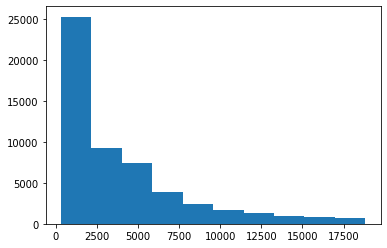

In [6]:
plt.hist(diamonds.price)

(array([1553., 6490., 8341., 4663., 6380., 5936., 7871., 5570., 4048.,
        3088.]),
 array([5.78996017, 6.19525295, 6.60054572, 7.0058385 , 7.41113127,
        7.81642405, 8.22171683, 8.6270096 , 9.03230238, 9.43759515,
        9.84288793]),
 <a list of 10 Patch objects>)

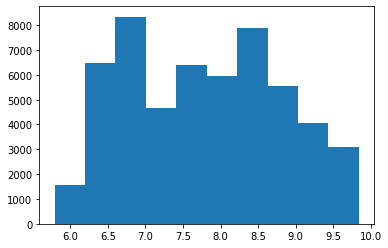

In [7]:
plt.hist(np.log1p(diamonds.price))

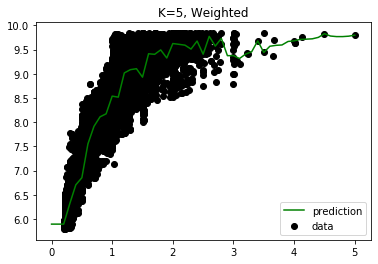

Accuracy: 0.28 (+/- 1.40)


In [8]:
#KNN Model

from sklearn import neighbors
from scipy import stats

knn = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')
X = pd.DataFrame(diamonds.carat)
Y = pd.DataFrame(np.log1p(diamonds.price))

knn.fit(X, Y)


# Set up our prediction line.
T = np.arange(0, np.max(diamonds['carat']), 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=5, Weighted')
plt.show()

#Get R-squared
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


In [9]:
#OLS Model
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

X = pd.DataFrame(diamonds.carat)
Y = pd.DataFrame(np.log1p(diamonds.price))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=465)

X_train = sm.add_constant(X_train)

results = sm.OLS(y_train, X_train).fit()
results.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                 2.380e+05
Date:                Thu, 23 Jan 2020   Prob (F-statistic):               0.00
Time:                        15:50:07   Log-Likelihood:                -21453.
No. Observations:               43152   AIC:                         4.291e+04
Df Residuals:                   43150   BIC:                         4.293e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2182      0.004   1661.878      0.000       6.211       6.226
carat          1.9649      0.004    487.812      0.000       1.957       1.973
==============================================================================
Omnibus:                     8743.738   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            59696.033
Skew:                          -0.804   Prob(JB):                         0.00
Kurtosis:                       8.533   Cond. No.                         3.64
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

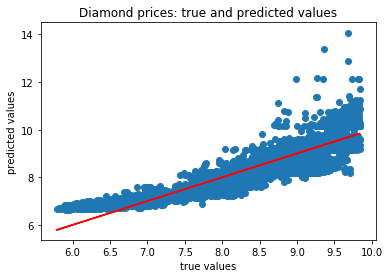

In [10]:
#Add a constant
X_test = sm.add_constant(X_test)

#Make predictions using predict() function
y_preds = results.predict(X_test)

#Model graph
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color='red')
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title('Diamond prices: true and predicted values')
plt.show()

The R-squared value for the OLS model is 0.846, compared to 0.28 for the KNN model. Thus, the OLS model for prediciting diamond price is the better model.